# Sentimement Analsis with Python

In [4]:
import tweepy

# General purpose packages
import os
import pandas as pd
import numpy as np
import re
from pprint import pprint
from bs4 import BeautifulSoup

# Sklearn
import sklearn
from sklearn.datasets import load_files
from sklearn import datasets
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Natural language processing packages

import spacy
import nltk
import nltk.corpus
from textblob import TextBlob
from nltk import ngrams, bigrams, trigrams
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud


# Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('fivethirtyeight')



In [5]:
# Stop words are words that have low importance in a sentece

stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Loading move review data


In [6]:
from nltk.corpus import movie_reviews
# A list of all the words in  the 'movie_reviews'
words = movie_reviews.words()
print(words)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [7]:
# Total number of words in the movie review
print(len(words))

1583820


In [8]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


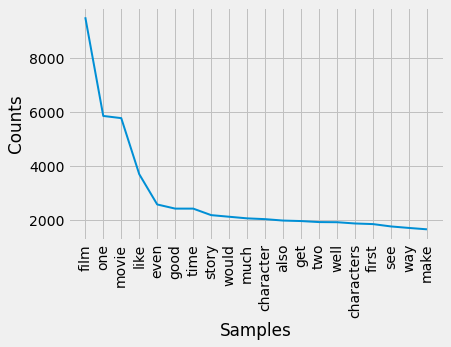

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049), ('character', 2020), ('also', 1967), ('get', 1949), ('two', 1911), ('well', 1906), ('characters', 1859), ('first', 1836), ('see', 1749), ('way', 1693), ('make', 1642), ('life', 1586), ('really', 1558), ('films', 1536), ('plot', 1513), ('little', 1501), ('people', 1455), ('could', 1427), ('scene', 1397), ('man', 1396), ('bad', 1395), ('never', 1374), ('best', 1333), ('new', 1292), ('scenes', 1274), ('many', 1268), ('director', 1237), ('know', 1217), ('movies', 1206), ('action', 1172), ('great', 1148), ('another', 1121), ('love', 1119), ('go', 1113), ('made', 1084), ('us', 1073), ('big', 1064), ('end', 1062), ('something', 1061), ('back', 1060), ('still', 1047), ('world', 1037), ('seems', 1033), ('work', 1020), ('makes', 992), ('however', 989), ('every', 947), ('though', 940), ('better', 922), ('real', 915), ('audience', 914), 

In [9]:
cleaned_words = [w for w in words if w not in stop_words and w.isalpha()]
freq_dist = nltk.probability.FreqDist(cleaned_words)
freq_dist.plot(20)
plt.show()
print(freq_dist.most_common(100))

In [10]:
# most common words in the movie reviews
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

In [11]:
# After cleaning
# most common words in the movie reviews
nltk.FreqDist(cleaned_words).most_common(15)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906)]

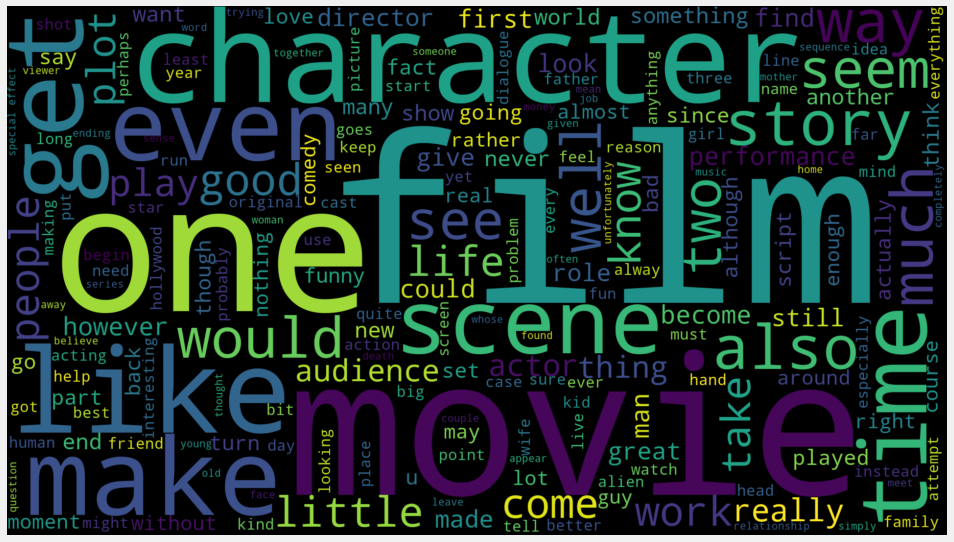

In [20]:
text = " ".join(cleaned_words)
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Loading data

In [21]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')

In [22]:
# reading the first 20 reviews
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [23]:
df.shape

(50000, 2)

In [24]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [25]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


In [26]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [27]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text.lower()


#Apply function on review column
df['cleaned_review'] = df['review'].apply(denoise_text)

In [28]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is..."


In [29]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-z0-9\s]','',text)

In [30]:
#Apply function on review column
df['cleaned_review'] = df['cleaned_review'].apply(remove_special_characters)

In [31]:
df

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


In [32]:
# Steming

In [33]:
#Stemming the text
def stem_text(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['stemmed_review'] = df['cleaned_review'].apply(stem_text)

In [45]:
#lemm the text
def lemmetize_text(text):
    lm = WordNetLemmatizer()
    text= ' '.join([lm.lemmatize(word) for word in text.split()])
    return text
#Apply function on review column
df['lemma_review'] = df['cleaned_review'].apply(lemmetize_text)

In [46]:
df.head()

,review,sentiment,cleaned_review,stemmed_review,review-without-stopwords,lemma_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other review ha mention that after ...,one review ha mention watch 1 oz episod youll ...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonder littl product the film techniqu is ve...,wonder littl product film techniqu veri unassu...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought thi wa a wonder way to spend time on...,thought thi wa wonder way spend time hot summe...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,basic there a famili where a littl boy jake th...,basic famili littl boy jake think zombi hi clo...,basically there a family where a little boy ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter mattei love in the time of money is a v...,petter mattei love time money visual stun film...,petter matteis love in the time of money is a ...


In [47]:
#set stopwords to english

#removing the stopwords
def remove_stopwords(text):
    return ' '.join ([w for w in text.split() if w not in stop_words])
    

In [62]:
df['review-without-stopwords'] = df['lemma_review'].apply(remove_stopwords)

In [63]:
df.head()

,review,sentiment,cleaned_review,stemmed_review,review-without-stopwords,lemma_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,one of the other review ha mention that after ...,one reviewer ha mentioned watching 1 oz episod...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,a wonder littl product the film techniqu is ve...,wonderful little production filming technique ...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,i thought thi wa a wonder way to spend time on...,thought wa wonderful way spend time hot summer...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,basic there a famili where a littl boy jake th...,basically family little boy jake think zombie ...,basically there a family where a little boy ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,petter mattei love in the time of money is a v...,petter matteis love time money visually stunni...,petter matteis love in the time of money is a ...


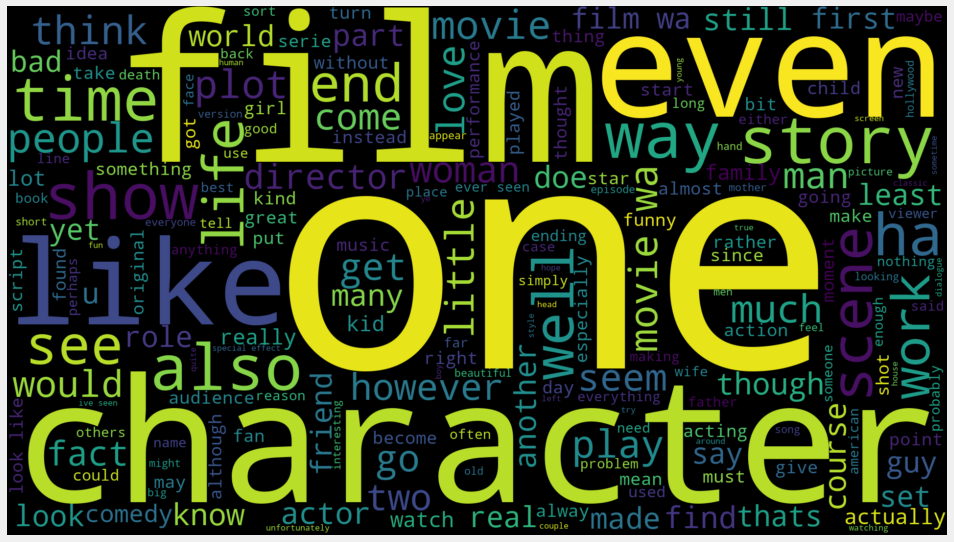

In [64]:
text = " ".join([sent for sent in df['review-without-stopwords']])
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
#split the dataset  
#train dataset
X_train = df['review'][:40000]
y_train = df['sentiment'][:40000]

#test dataset
X_test = df['review'][40000:]
y_test = df['sentiment'][40000:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [93]:
# Bags of words model
# It is used to convert text documents to numerical vectors or bag of words.

In [94]:
#Count vectorizer for bag of words
cv = CountVectorizer(min_df = 0,max_df = 1,binary = False,ngram_range = (1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews = cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6183315)
BOW_cv_test: (10000, 6183315)


In [95]:
# Term Frequency-Inverse Document Frequency model (TFIDF)
# It is used to convert text documents to matrix of tfidf features.

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [97]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_train)
#transformed test reviews
tv_test_reviews=tv.transform(X_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6183315)
Tfidf_test: (10000, 6183315)


In [98]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [99]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [100]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7676
lr_tfidf_score : 0.7659


In [101]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.77      0.77      0.77      4993
    Negative       0.77      0.77      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.78      0.75      0.76      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [102]:
# Multinomial Naive Bayes for bag of words and tfidf features
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [103]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [104]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7682
mnb_tfidf_score : 0.7677


In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [106]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      4993
    Negative       0.77      0.76      0.77      5007

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [256]:
# Separate function has been used to fetch Twitter data and change to CSV. Since the function has a user credition, it was not
# share on this file

In [257]:
df_tweets = pd.read_csv('./datasets/tweets.csv')

In [258]:
df_tweets

,Unnamed: 0,Tweets,cleaned_tweet
0,0,RT @ProfDanielMuijs: A Sunday reminder of this...,sunday reminder excellent article using lon...
1,1,"Want to work in #Wellesley, MA? View our lates...",want work wellesley view latest opening
2,2,RT @AdamWSalerno: There is no question the dam...,question damage done zoom school science clea...
3,3,RT @SKMorefield: We know - from science and da...,know science data amp jazz covid19 poses li...
4,4,RT @DukeU: .@DukeMedSchool has launched a new ...,has launched new patient first curriculum pu...
...,...,...,...
128,190,Analysis of Contemporary Trends in Data Scienc...,analysis contemporary trends data science appl...
129,191,When mf put Science &amp; Data 1st! https://t....,mf put science amp data 1st
130,194,@StellaParton I can understand the press confe...,understand press conference awkwardness propo...
131,195,"RT @ai_jobsNET: HIRING: Data Science Manager, ...",jobsnet hiring data science manager homes plat...


In [259]:
df_tweets['cleaned_tweet'] = df_tweets['Tweets'].apply(denoise_text)

In [260]:
df_tweets['cleaned_tweet'] = df_tweets['cleaned_tweet'].apply(remove_special_characters)
df_tweets

,Unnamed: 0,Tweets,cleaned_tweet
0,0,RT @ProfDanielMuijs: A Sunday reminder of this...,rt profdanielmuijs a sunday reminder of this e...
1,1,"Want to work in #Wellesley, MA? View our lates...",want to work in wellesley ma view our latest o...
2,2,RT @AdamWSalerno: There is no question the dam...,rt adamwsalerno there is no question the damag...
3,3,RT @SKMorefield: We know - from science and da...,rt skmorefield we know from science and data ...
4,4,RT @DukeU: .@DukeMedSchool has launched a new ...,rt dukeu dukemedschool has launched a new pati...
...,...,...,...
128,190,Analysis of Contemporary Trends in Data Scienc...,analysis of contemporary trends in data scienc...
129,191,When mf put Science &amp; Data 1st! https://t....,when mf put science data 1st httpstcouenjzeq1...
130,194,@StellaParton I can understand the press confe...,stellaparton i can understand the press confer...
131,195,"RT @ai_jobsNET: HIRING: Data Science Manager, ...",rt ai_jobsnet hiring data science manager home...


In [261]:
df_tweets['tweet_without_stopwords'] = df_tweets['cleaned_tweet'].apply(remove_stopwords)

In [262]:
df_tweets['lemmetized_tweet'] = df_tweets['tweet_without_stopwords'].apply(lemmetiaze_text)

In [263]:
df_tweets

,Unnamed: 0,Tweets,cleaned_tweet,tweet_without_stopwords,lemmetized_tweet
0,0,RT @ProfDanielMuijs: A Sunday reminder of this...,rt profdanielmuijs a sunday reminder of this e...,rt profdanielmuijs sunday reminder excellent a...,rt profdanielmuijs sunday reminder excellent a...
1,1,"Want to work in #Wellesley, MA? View our lates...",want to work in wellesley ma view our latest o...,want work wellesley view latest opening httpst...,want work wellesley view latest opening httpst...
2,2,RT @AdamWSalerno: There is no question the dam...,rt adamwsalerno there is no question the damag...,rt adamwsalerno question damage done zoom scho...,rt adamwsalerno question damage done zoom scho...
3,3,RT @SKMorefield: We know - from science and da...,rt skmorefield we know from science and data ...,rt skmorefield know science data jazz covid19 ...,rt skmorefield know science data jazz covid19 ...
4,4,RT @DukeU: .@DukeMedSchool has launched a new ...,rt dukeu dukemedschool has launched a new pati...,rt dukeu dukemedschool launched new patient fi...,rt dukeu dukemedschool launched new patient fi...
...,...,...,...,...,...
128,190,Analysis of Contemporary Trends in Data Scienc...,analysis of contemporary trends in data scienc...,analysis contemporary trends data science appl...,analysis contemporary trend data science appli...
129,191,When mf put Science &amp; Data 1st! https://t....,when mf put science data 1st httpstcouenjzeq1...,mf put science data 1st httpstcouenjzeq1rj htt...,mf put science data 1st httpstcouenjzeq1rj htt...
130,194,@StellaParton I can understand the press confe...,stellaparton i can understand the press confer...,stellaparton understand press conference awkwa...,stellaparton understand press conference awkwa...
131,195,"RT @ai_jobsNET: HIRING: Data Science Manager, ...",rt ai_jobsnet hiring data science manager home...,rt ai_jobsnet hiring data science manager home...,rt ai_jobsnet hiring data science manager home...


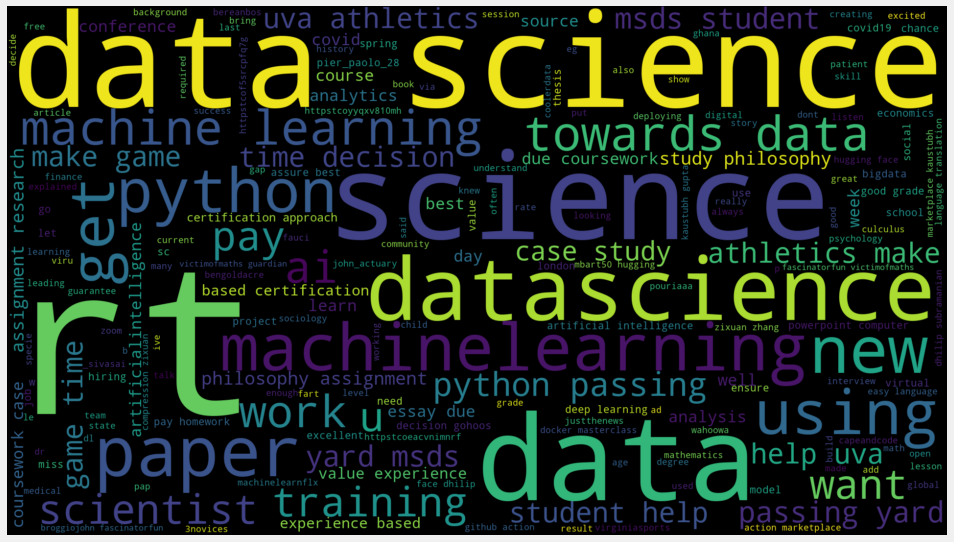

In [264]:
text = " ".join([sent for sent in df_tweets['lemmetized_tweet']])
wordcloud = WordCloud(stopwords=stop_words, background_color='black',
                     width=1920, height=1080).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

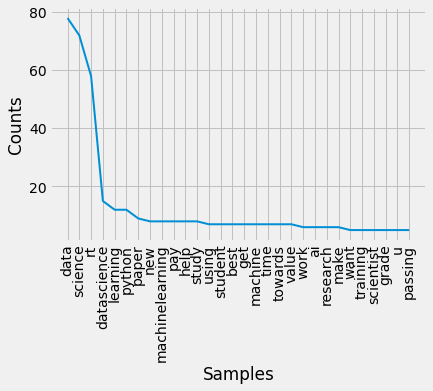

[('data', 78), ('science', 72), ('rt', 58), ('datascience', 15), ('learning', 12), ('python', 12), ('paper', 9), ('new', 8), ('machinelearning', 8), ('pay', 8), ('help', 8), ('study', 8), ('using', 7), ('student', 7), ('best', 7), ('get', 7), ('machine', 7), ('time', 7), ('towards', 7), ('value', 7), ('work', 6), ('ai', 6), ('research', 6), ('make', 6), ('want', 5), ('training', 5), ('scientist', 5), ('grade', 5), ('u', 5), ('passing', 5), ('yard', 5), ('msds', 5), ('uva', 5), ('athletics', 5), ('game', 5), ('decision', 5), ('case', 5), ('philosophy', 5), ('assignment', 5), ('based', 5), ('good', 5), ('day', 4), ('week', 4), ('analytics', 4), ('well', 4), ('artificialintelligence', 4), ('source', 4), ('essay', 4), ('due', 4), ('coursework', 4), ('course', 4), ('learn', 4), ('covid', 4), ('computer', 4), ('analysis', 4), ('experience', 4), ('certification', 4), ('approach', 4), ('conference', 4), ('excellent', 3), ('school', 3), ('need', 3), ('covid19', 3), ('let', 3), ('bigdata', 3), (

In [265]:

txt= []
for lemma in df_tweets['lemmetized_tweet']:
    txt += lemma.split()
freq_dist = nltk.probability.FreqDist(txt)
freq_dist.plot(30)
plt.show()
print(freq_dist.most_common(100))